In [11]:
import pandas as pd
uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'

datos = pd.read_csv(uri)
datos.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [12]:
nuevos_nombres = {
    'mileage_per_year': 'Millas',	
    'model_year': 'Año modelo',	
    'price': 'Precio',	
    'sold': 'Vendido'
}
datos = datos.rename(columns = nuevos_nombres)
datos.head()

,Unnamed: 0,Millas,Año modelo,Precio,Vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [13]:
cambiar = {
    'no':0,
    'yes':1
}
datos['Vendido'] = datos['Vendido'].map(cambiar)
datos.head()

,Unnamed: 0,Millas,Año modelo,Precio,Vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [14]:
from datetime import datetime
año_actual = datetime.today().year

datos['Edad modelo'] = año_actual - datos['Año modelo']
datos.head()

datos['Kilometros'] = (datos['Millas']*1.60934).round(2)
datos.head()

,Unnamed: 0,Millas,Año modelo,Precio,Vendido,Edad modelo,Kilometros
0,0,21801,2000,30941.02,1,22,35085.22
1,1,7843,1998,40557.96,1,24,12622.05
2,2,7109,2006,89627.50,0,16,11440.80
3,3,26823,2015,95276.14,0,7,43167.33
4,4,7935,2014,117384.68,1,8,12770.11


In [15]:
datos = datos.drop(columns = ['Unnamed: 0', 'Millas', 'Año modelo'], axis = 1)
datos.head()

,Precio,Vendido,Edad modelo,Kilometros
0,30941.02,1,22,35085.22
1,40557.96,1,24,12622.05
2,89627.50,0,16,11440.80
3,95276.14,0,7,43167.33
4,117384.68,1,8,12770.11


In [17]:
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

x = datos[['Precio','Edad modelo',	'Kilometros']]
y = datos['Vendido']

SEED = 20
np.random.seed(SEED)
train_x, test_x, train_y, test_y= train_test_split(x, y, test_size=0.25, random_state=SEED, stratify=y)

modelo = LinearSVC()
modelo.fit(train_x, train_y)
pred = modelo.predict(test_x)
accuracy = accuracy_score(test_y, pred) * 100

print("Porcentaje de acieto %.2f " % (accuracy))

Porcentaje de acieto 58.00 


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [19]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()
dummy.fit(train_x, train_y)
pred = dummy.predict(test_x)
accuracy = accuracy_score(test_y, pred) * 100

print("Porcentaje de acieto dummy %.2f " % (accuracy))

Porcentaje de acieto dummy 58.00 


In [20]:

dummy_most_frequent = DummyClassifier(strategy='most_frequent')
dummy_most_frequent.fit(train_x, train_y)
pred = dummy_most_frequent.predict(test_x)
accuracy = accuracy_score(test_y, pred) * 100

print("Porcentaje de acieto dummy most grequent %.2f " % (accuracy))

Porcentaje de acieto dummy most grequent 58.00 


In [21]:
from sklearn.preprocessing import StandardScaler

SEED = 20
np.random.seed(SEED)
train_x_raw, test_x_raw, train_y_raw, test_y_raw= train_test_split(x, y, test_size=0.25, random_state=SEED, stratify=y)

scaler = StandardScaler()
scaler.fit(train_x_raw)

train_x = scaler.transform(train_x_raw)
test_x = scaler.transform(test_x_raw)

modelo = SVC()
modelo.fit(train_x, train_y)
pred = modelo.predict(test_x)
accuracy = accuracy_score(test_y, pred) * 100

print("Porcentaje de acieto %.2f " % (accuracy))

Porcentaje de acieto 75.92 


In [34]:
from sklearn.tree import DecisionTreeClassifier

SEED = 20
np.random.seed(SEED)
train_x, test_x, train_y, test_y= train_test_split(x, y, test_size=0.25, random_state=SEED, stratify=y)

modelo = DecisionTreeClassifier(max_depth = 3)
modelo.fit(train_x, train_y)
pred = modelo.predict(test_x)
accuracy = accuracy_score(test_y, pred) * 100

print("Porcentaje de acieto %.2f " % (accuracy))

Porcentaje de acieto 78.40 


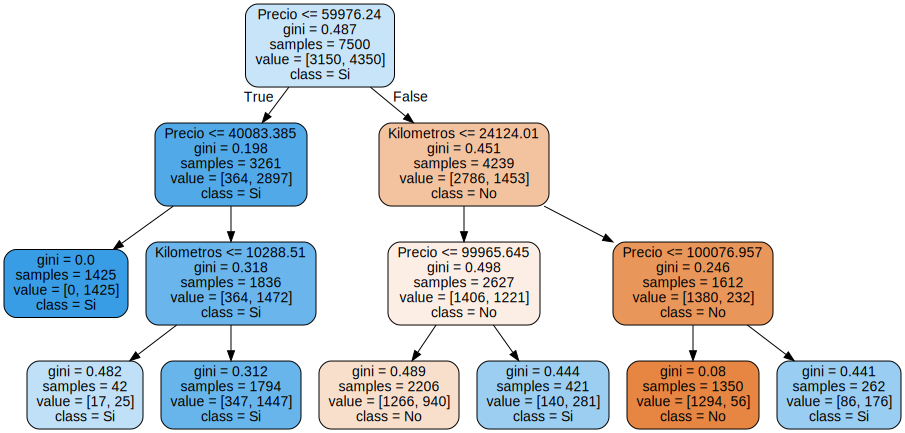

In [35]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(modelo, 
                           feature_names = x.columns,
                           filled = True,
                           rounded = True,
                           class_names = ['No', 'Si'])

# !pip install graphviz
# !apt-get install graphviz

grafico = graphviz.Source(dot_data)
grafico